<div style="direction:rtl; text-align:center; font-size:16px; line-height:1.6; font-weight: bold;">
<h1>معالجة وتصنيف النصوص</h1>
</div>
<br/>

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6 ;color:red">
ملاحظة: تستطيع الاستفادة بشكل أكبر من هذا المشروع بالضغط على <a href="http://colab.research.google.com/github/abdulazizali/personal_projects/blob/master/yelp_text_classification/Yelp_Arabic.ipynb">هذا الرابط</a> وستحصل على نسخة منه يمكنك تعديلها بواسطة Google colaboratory وستكون نسختك الخاصة محفوظة بحسابك في قوقل درايف. 
</p>


<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

<b> مقدمة: </b>
<br/>
يعد تحليل وتصنيف النصوص Text Classification أحد أهم تطبيقات تعلم الآلة  وأكثرها تعقيداً، ولها تطبيقات عدة في المجال الأكاديمي وقطاع الأعمال، مثل تصنيف الرسائل إلى رسائل سبام ورسائل سليمة، وتحليل المشاعر في النصوص Sentiment Analysis،  وتصنيف الأخبار حسب المحتوى (أخبار رياضية – سياسية – اقتصادية ..إلخ). وغيرها الكثير.
<br/>
كما يعتبر تصنيف النصوص أحد أشكال الـ Supervised Learning، ونستطيع تقسيمه من حيث "التصنيف" إلى ثلاثة أنواع: ثنائي التصنيف Binary Classification  : مثل تصنيف رسائل السبام (سبام – غير سبام)، أو تحليل المشاعر في النصوص (إيجابية – سلبية). ومتعدد الأصناف Multiclass Classification: مثل النوع السابق ولكن بثلاثة تصنيفات أوأكثر. وأخيراً متعدد التسميات Multi-Label Classification: ومثاله تصنيف الأخبار حسب المحتوى، والاختلاف هنا عن النوعين السابقين هو أن الخبر الواحد قد يأخذ تصنيفاً واحدًا، أو أكثر من تصنيف (خبر رياضي – سياسي).
<br/>
هدف هذا المشروع هو استخدام بيانات منصة Yelp المعروفة لتقييم المتاجر والمطاعم وغيرها، لبناء نموذج يقوم بتصنيف نصوص التعليقات بناء على التقييمات الخاصة بها، ليكون النوذج قادراً بعد تدريبه على التنبؤ بتقييم أي نص جديد يزود به. ومن هنا نلحظ أن مشكلتنا تنتمي للنوع الثاني Multiclass Classification بسبب أن تصنيفات التعليقات تنقسم إلى خمسة تصنيفات (1-5).
كما سنتطرق سوياً إلى أهم المفاهيم والتقنيات والخوارزميات (البسيطة) المستخدمة في تصنيف النصوص، مثل طرق معالجة النصوص وتحويلها لقيم رقمية باستخدام Word2Vec و TF-IDF، واستخراج الخصائص الهامة في كل تصنيف، وتدريب النماذج المختلفة، ليكون هذا المشروع مدخلاً مناسباً للمبتدئين.
</p>


<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

<b> مجموعة البيانات: </b>
<br/>
البيانات المستخدمة في هذا المشروع هي مجموعة بيانات منصة Yelp، وهي منصة شهيرة تنتشر بأمريكا وأوربا، وهي منافسة لمنصة Foursquare المعروفة في منطقتنا. تتيح المنصة للمستخدمين استعراض المتاجر والمطاعم وغيرها وإضافة التعليقات التقييمات والصور وتسجيل الحضور Check-ins لهذه الأماكن. وقد قامت المنصة بطرح مجموعة كبيرة من بياناتها كمنافسة  لمعالجة الصور وتحليل النصوص وغيرها. ويمكن الاطلاع على التفاصيل من خلال  <a href="https://www.yelp.com/dataset/challenge">موقعهم</a> أو عن طريق <a href="https://www.kaggle.com/yelp-dataset/yelp-dataset">كاقل</a>
<br/>
مجموعة البيانات هذه تحتوي على عدة مجموعات فرعية، مثل بيانات المتاجر والأعمال، وأوقات العمل، وبيانات التعليقات والتقييمات، وبيانات المستخدمين ونشاطهم. مايهمنا هنا هي بيانات التعليقات (النصوص) والتقييمات (1-5). وسنستخدم النصوص كـ Training features والتقييمات كـ Targets.

</p>


<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

<b>تحديات في المشروع: </b>
<br/>
بشكل عام، تعتبر تطبيقات تحليل ومعالجة النصوص أحد أصعب تطبيقات تعلم الآلة، فاللغات الطبيعة بالغة التعقيد والتركيب بحيث يصعب تمثيلها رياضياً لتتعامل معها خوارزميات تعلم الآلة البسيطة. ولذلك، عند الرغبة بالحصول على نتائج عالية ودقيقة، فإنه يلزمنا استخدام خوارزميات أكثر تعقيداً مثل Recurrent Neural Networks وغيرها من خوارزميات التعلم العميق، ولكننا لن نتطرق لها في هذا المشروع.
<br/>
فيما يلي أبرز الصعوبات والتحديات التي ستواجهنا في هذا المشروع:
<br/>
<ul style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
<li> طبيعة تعقيد وتركيب اللغات الطبيعية، وضروة فهم السياق كاملاً لا الاقتصار على الكلمات ومعانيها. </li>
<li> طبيعة نصوص التعليقات القصيرة، على عكس نصوص المقالات أو الكتب مثلاً، ولهذا سيكون من الصعب تصنيف نص في ظل المعلومات القليلة عنه. </li>
<li> تأثير الجانب النفسي على التقييم والذي لا ينعكس بالضرورة على نص التعليق. </li>
<li> كلما كثرت التصنيفات زاد تعقيد المشكلة، فدقة التنبؤ العشوائي لنص له احتماليين (0-1) ستكون 50%، أما دقة التنبؤ العشوائي لنص له خمسة احتمالات (1-5) ستكون 20% </li>
<li>	يزيد من صعوبة التصنيف كذلك وجود علاقة بين التصنيفات، فالتصنيفات (4 و 5) أو (1 و 2) متقاربة في النصوص ويصعب التفريق بينها، بينما التصنيف 3 قد لا يحمل عبارات واضحة تساعد في تصنيفه. </li>
<li>	كذلك صعوبة قياس أداء النموذج، فالنموذج الذي نزوده بنص تقييمه في الأصل 5، ولكن يتنبأ بـ 4، أفضل من النموذج الذي يتنبأ لنفس النص بـ 3. ولهذا نحتاج لاستعمال أكثر من مقياس أداء. </li>
<li>	تمثيل النصوص رقمياً Vectorizing يستهلك كثيراً من الذاكرة، ولذلك قد نضطر للتضحية بكثير من البيانات التي قد تكون هامة في سبيل  القدرة على معالجة البيانات. </li>
</ul>

</p>


<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

<b>مسار المشروع:</b>
<br/>
سنسير في هذا المشروع على كامل الخطوات الرئيسية لغالب مشاريع تعلم الآلة، وهي:
<br/>

<ul style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
<li> استعراض واستكشاف البيانات
<ul>
<li> تحميل البيانات</li>
<li> استعراض البيانات</li>
</ul>
</li>
<li> معالجة البيانات
<ul>
<li> معالجة وتنظيف البيانات</li>
<li> تقسيم البيانات إلى بيانات تدريب واختبار</li>
<li> تحويل النصوص إلى قيم رقمية باستخدام Word2Vec و TF-IDF</li>
<li> استخراج الخصائص الهامة في كل تصنيف</li>
</ul>
</li>
<li>فحص النماذج
<ul>
<li> تحديد النماذج</li>
<li> تحديد مقاييس الأداء</li>
<li> تدريب واختبار أداء النماذج باستخدام بيانات التحقق Validation set </li>
</ul>
</li>
<li> اختيار واختبار النموذج المناسب ببيانات الاختبار</li>
<li> تقييم النموذج </li>
<li>تحويل المهمة إلى تصنيف ثنائي </li>
</ul>

</p>


<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">
<h1>
استعراض واستكشاف البيانات
</h1>
</div>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">
<h2>
تحميل البيانات
</h2>
</div>

In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split
from langdetect import detect
from textblob import TextBlob
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

import time
import random
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
سنقوم الآن بقراءة البيانات من الملف المتاجر وعرض أول 5 أسطر منها.
<br/>
هذا الجدول يحتوي على البيانات الرئيسية للأعمال والمتاجر، والهدف من استخدامها هنا هو أننا نريد تحديد المطاعم فقط، من أجل تحديد التعليقات الخاصة بالمطاعم من جدول التقييمات. بالطبع نستطيع التعامل مع كامل التعليقات بدون استثناء، لكن تحديد مجال محدد مثل المطاعم أو غيرها يعطي بيانات متسقة أكثر من لو أننا أدخلنا تعليقات من عدة مجالات: مطاعم، محلات أثاث، نوادي ..إلخ
</p>

In [87]:
business = pd.read_csv("https://s3-us-west-2.amazonaws.com/aws-logs-732029909149-us-west-2/yelp_business.csv")
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services & Government
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;American (Traditional);Burgers;Restaurants


<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
الجدول أعلاه يحتوي على بيانات المتاجر، مايهمنا هنا هو آخر عامود categories .لأننا سنقوم لاحقاً باستخدامه لتحديد المطاعم فقط
<br/>
الآن سنقوم بقراءة بيانات التعليقات والتقييمات، وبسبب أن حجم الملف كبير ويحتوي على أكثر من 5 ملايين تعليق وحجمه على الهاردسك أكثر من 3 قيقا، ولو قرأناه كاملاً سيأخذ أكثر من 5 قيقا من الرام، فسنقوم بقراءة 1000,000 تقييم فقط بالطريقة التالية:
</p>

In [88]:
n = 5261668 - 1 #number of records in file (excludes header)
s = 1000000
skip = sorted(random.sample(range(1,n+1),n-s))
reviews = pd.read_csv("https://s3-us-west-2.amazonaws.com/aws-logs-732029909149-us-west-2/yelp_review.csv", skiprows=skip)

reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,"Who would have guess that you would be able to get fairly decent Vietnamese restaurant in East York? \n\nNot quite the same as Chinatown in terms of pricing (slightly higher) but definitely one of the better Vietnamese restaurants outside of the neighbourhood. When I don't have time to go to Chinatown, this is the next best thing as it is down the street from me.\n\nSo far the only items I have tried are the phos (beef, chicken & vegetarian) - and they have not disappointed me! Especially the chicken pho.\n\nNext time I go back, I'm going to try the banh cuon (steamed rice noodle) and the vermicelli!",0,0,2
1,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, vegan version of the cheese curds and gravy!!\n\nHaven't done the poutine taste test yet with smoke's but Im excited to see which is better. However poutini's might win as they are vegan and gluten-free",1,0,0
2,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs and does a great job! She is very patience with him and will make any adjustments you need before you leave the store. My little guy has no problems coming here.\n\nThey also have very good bully sticks (the non-smelly ones) that my little guy and his friends love!,3,0,0
3,x5oV6wm9_Pb1QQ6jkjDjwQ,u0LXt3Uea_GidxRW1xcsfg,13nKUHH-uEUXVZylgxchPA,1,2011-02-16,"I thought Tidy's Flowers had a great reputation as a florist, but I guess I was wrong!\n\nFor Valentine's Day my boyfriend had ordered roses with Tidy's. However, the flowers that were delivered was not what he had ordered. He had placed in an order for long stem roses, mixed with orchids and was charged for that. What had showed up was a small vase with 4 short cut roses and some greens - table ornament, not really Valentine's Day flowers. \n\nIn speaking with another friend, something similar happened to her - her fiancee had ordered a dozen of roses for her for Valentine's Day while he was in Germany as a surprise and they never showed up. So when he called them to complaint, they actually then called up my friend to confirm whether or not she had received the flowers. Which she didn't, so they said they would resend - only to have them deliver it to the wrong place.\n\nUnderstanding that Valentine's Day is the most busiest day for florists and mistakes do happen, the way they had handled it was not what would have been expected from a florist of that nature.",9,0,1
4,Q-mhDIKa3wJuWEx9uuciIA,u0LXt3Uea_GidxRW1xcsfg,Xy74meQwdTnloAAyRC-4cg,3,2013-07-01,burgers are very big portions here.\n\ndefinitely order the onion ring tower to share...\n\nMilkshakes are tasty! My personal favourite - the vanilla one.,0,0,0


<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
كما هو واضح في الجدول أنه يحتوي عدة معلومات لربط التعليق بالمستخدم والمتجر وغيرها، لكن مايهمنا هو حقل نص التعليق والتقييم فقط. قد يكون من المناسب دراسة الارتباط بين الحقول الأخرى وبين التقييم مثل (useful, funny, cool)، وقد يكون من المناسب إدخالها من ضمن البيانات، لكن نريد هنا التركيز فقط على النصوص وحدها.

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

قبل تحديد بيانات المطاعم، من الجيد توضيح أن هناك تصنيفات أخرى تدل على المطعم مثل Food, Sandwiches, Bakeries, Pizza, .. etc. ومن المناسب تضمينها في البيانات، ولكن سنقوم بتجاهلها لوفرة البيانات. ولمعرفة أكثر 15 تصنيف في الجدول سنقوم بالتالي:
</p>

In [89]:
business['categories'].str.split(';').apply(lambda x: pd.Series(x)).stack().value_counts()[:15]

Restaurants                  54618
Shopping                     27971
Food                         24777
Beauty & Spas                17014
Home Services                16205
Health & Medical             14230
Nightlife                    12154
Local Services               11232
Automotive                   11052
Bars                         10563
Event Planning & Services    9078 
Active Life                  8257 
Fashion                      7019 
Sandwiches                   6345 
Fast Food                    6280 
dtype: int64

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

الآن سنقوم بتحديد المطاعم فقط من جدول business بالطريقة التالية:

</p>

In [90]:
Restaurants = business[business['categories'].str.contains('Restaurants') == True]
Restaurants.shape[0]

54618

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

العدد السابق يوضح عدد المتاجر التي لها تصنيف "مطعم" في مجموعة البيانات. الآن نقوم بتحديد التعليقات التي تنتمي إلى هذه المطاعم فقط:

</p>

In [91]:
Restaurants_reviews = reviews[reviews.business_id.isin(Restaurants['business_id']) == True]
Restaurants_reviews.shape[0]

612647

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
 يعتبر عدد جيد نوعاُ ما.
<br/>
الآن ننتقل لمرحلة استكشاف البيانات ...
</p>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

<h2>استكشاف البيانات</h2>

</div>

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
الخطوة الأولى طبعاً هي معرفة عدد الحقول الفارغة والمتكررة:
</p>

In [92]:
Restaurants_reviews[['text', 'stars']].isnull().sum()

text     0
stars    0
dtype: int64

In [93]:
Restaurants_reviews.duplicated().sum()

0

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
جيد، لا يوجد بيانات فارغة، ولا متكررة. الأن نتحقق من توزيع أطوال النصوص بالطريقة التالي: ننشئ عامود جديد يأخذ طول نص التعليق في كل صف، ومن ثم نستعرض أبرز الخصائص الإحصائية عنه
</p>

In [94]:
Restaurants_reviews['text_len'] = Restaurants_reviews['text'].str.len()
Restaurants_reviews.text_len.describe()

count    612647.000000
mean     597.064948   
std      556.766480   
min      2.000000     
25%      233.000000   
50%      421.000000   
75%      766.000000   
max      5022.000000  
Name: text_len, dtype: float64

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
الجدول السابق يعرض أبرز الخصائص الإحصائية لطول النص، وتفيدنا هذه المعلومات فيما لو أردنا تحديد عدد أقل لطول النص بحيث تكون جميع التعليقات أطول من هذا العدد.
<br/>
مثال: سنخسر 50% من التعليقات في حال حددنا التعليقات التي طول نصوصها أطول من 421. سنخسر بهذه الخطوة عدة تعليقات على مستوى مجموعة البيانات، لكننا سنربح بيانات أكثر على مستوى التعليق الواحد كونه يحتوي على كلمات أكثر. سنقوم بهذه الخطوة لاحقاً.
<br/>
الآن دعنا نرى توزيع أطوال النصوص بشكل رسومي ليعطي فهم أعمق
</p>

Text(0.5,0,'text length')

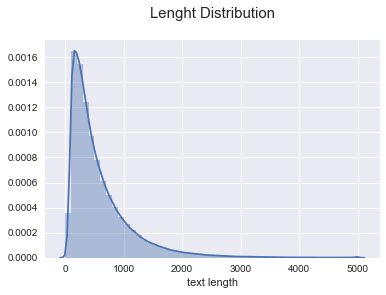

In [95]:
sns.distplot(Restaurants_reviews.text_len)
plt.title('Lenght Distribution\n', fontsize=15)
plt.xlabel('text length')

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
الآن من الجيد أن نعرض أطوال النصوص حسب التقييم، ولتسهيل عرض البيانات وجعلها أكثر وضوحاً سنجعل التقييمات 3 بدلا من 5، وستعرض توزيع أطوال النصوص لكل واحدة من هذه الثلاثة أصناف.
<br/>
مالفائدة من ذلك؟ الفائدة هي أننا لو وجدنا اخلاف واضح ومميز في توزيع أطوال النصوص، كأن تكون التقييمات الجيدة أطول بشكل ملحوظ عن التقييمات المنخفضة، فسيكون طول النص ميزة إضافية نضمنها للبيانات، لأن ذلك سيساعد النموذج في التصنيف بشكل أكثر دقة. لكن كما هو واضح أنه لا يوجد فرق بين أطوال النصوص، ولذلك فلا حاجة لإدراجه ضمن البيانات.
</p>

In [96]:
def plot_text_len_per_class(data):
    good = data[data['stars'] >=4].text_len
    sns.distplot(good, label='good reviews')
    med = data[data['stars'] ==3].text_len
    sns.distplot(med, label='mediocre reviews')
    bad = data[data['stars'] <=2].text_len
    sns.distplot(bad, label='bad reviews')
    plt.title('Lenght Distribution / Stars\n', fontsize=15)
    plt.xlabel('text length')
    plt.legend()

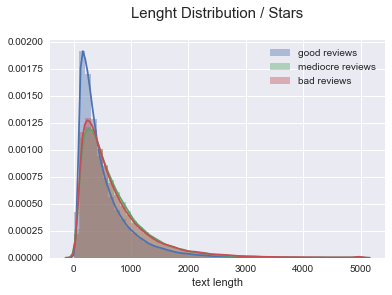

In [97]:
plot_text_len_per_class(Restaurants_reviews)

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
أحد أهم الأمور التي يجب أن تؤخذ في الحسبان هي توزيع التصنيفات داخل البيانات. فكثير من خوارزميات تعلم الآلة تعطي التصنيفات الأكثر أمثلة وزناُ أكبر بسبب أنه أكثر أمثلة فقط. وتسمى هذه المشكلة: البيانات غير المتوازنة Imbalanced Data. دعنا نشاهد توزير الأصناف في بياناتنا
</p>

In [98]:
def plt_calss_dist(data):
    stars_dist = data.stars.value_counts().sort_index()
    stars_dist = stars_dist/stars_dist.sum()
    stars_dist.plot.bar()
    plt.title('Stars Distribution\n', fontsize=15)
    plt.xlabel('stars')

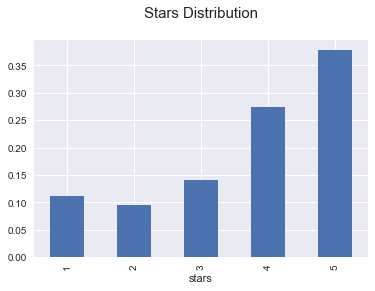

In [99]:
plt_calss_dist(Restaurants_reviews)

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
من الواضح أن البيانات غير متوازنة، ولحل هذه المشكلة لدينا عدة خيارات:
<ul style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
<li>تقليل عدد الأصناف ذات العدد الكبير Undersampling: ويعني أننا نحذف من البيانات التي تنتمي للتصنيفات الكبيرة حتى نصل لعدد متساوي لكل التصنيفات. هذا الحل قد يكون مناسب إذا كان لديك عدد ضخم من البيانات ولن تتأثر بالحذف.</li>
<li>زيادة عدد الأصناف ذات العدد القليل Oversampling: ويعني أننا نقوم بتكرار عينات عشوائية داخل كل تصنيف قليل حتى نصل لعدد متساو لكل التصنيفات. هذا الحل قد يكون مناسب إذا كان لديك عدد قليل من البيانات.</li>
<li>استخدام خوارزميات لا تتأثر بمشكلة البيانات غير المتوازنة، أو بتحديد class_weight=balanced في الخوارزميات التي تدعم ذلك في مكتبة sklearn</li>
</ul>
<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
للمزيد يمكنك الاطلاع على: <a href="https://elitedatascience.com/imbalanced-classes">elitedatascience</a> و <a href="https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/">analyticsvidhya</a>
<br/>
ونحن سنختار الخيار الثالث عند بناء النموذج.
</p>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h1>معالجة البيانات</h1>

</div>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>معالجة وتنظيف البيانات</h2>

</div>

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

كما أشرنا سابقاً، أننا سنقوم بتحديد التعليقات الطويلة نسبياً، وحذف التعليقات القصيرة، من أجل الحصول على بيانات أوفر على مستوى التعليق، والذي بدوره سيساعد على دقة التصنيف.
في الأكواد التالية سنقوم بتحديد النصوص التي أطوالها تقع ضمن النصف الأكبر في توزيع الأطول كما شاهدنا سابقاً
</p>

In [100]:
perc_50 = Restaurants_reviews.text_len.describe()[5]
old_len = Restaurants_reviews.shape[0]
long_reviews = Restaurants_reviews[Restaurants_reviews.text_len > perc_50]
print('we loose about %s from the data'%(long_reviews.shape[0]/old_len))

we loose about 0.4992646662760121 from the data


<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
سنقوم باستعراض بعض المعلومات الإحصائية من جديد بعد حذف نصف التعليقات. وكما هو واضح لا يوجد تغييرات كبيرة في توزيع أطوال، مع تحسن بسيط في توزيع التصنيفات
</p>

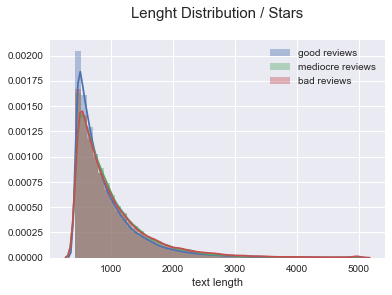

In [101]:
plot_text_len_per_class(long_reviews)

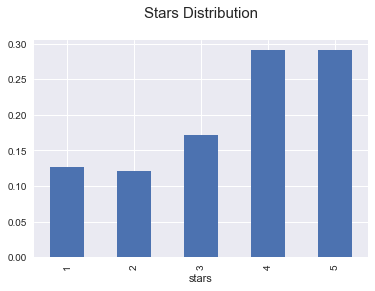

In [102]:
plt_calss_dist(long_reviews)

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
الآن سنستعرض تعليق واحد عشوائي من كل تقييم بهدف قراءة وفهم طبيعة التعليقات بشكل عام.
</p>

In [103]:
pd.set_option('display.max_colwidth', -1)
long_reviews.groupby('stars').apply(lambda x :x.iloc[random.choice(range(0,len(x)))])['text']

stars
1    Had this chicken on more than one occasion.  It has to be the worst crap I have ever had.It has no spice to it whatsoever.  It tastes like someone just threw flour on it and nothing else.  The only thing I did like from there is the potato salad....don't know if they still have the potato salad because I haven't been in years.. Bottom line I have had better chicken from Bojangles. This crap must have some kind of mind control drug in it to convince all these people in Charlotte that this chicken is special.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>تقسيم البيانات إلى بيانات تدريب واختبار</h2>

</div>

<p style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
سنقوم الآن بتقسيم البيانات إلى بيانات تدريب واختبار، 80% بيانات تدريب و 20% بيانات اختبار
</p>

In [104]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(long_reviews.text, long_reviews.stars, long_reviews.index, test_size=0.20, random_state=0)

print('Number of rows in the total set: {:,}'.format(long_reviews.shape[0]))
print('Number of rows in the training set: {:,}'.format(X_train.shape[0]))
print('Number of rows in the test set: {:,}'.format(X_test.shape[0]))

Number of rows in the total set: 305,873
Number of rows in the training set: 244,698
Number of rows in the test set: 61,175


<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>حويل النصوص إلى قيم رقمية باستخدام Word2Vec و TF-IDF</h2>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
يأتي الآن دور أهم جزء في هذا الدرس، وهو تحويل النصوص إلى قيم رقمية كي تستطيع الخوارزميات التعامل معها. كيف يمكن ذلك؟
<br/>
أحد أشهر المفاهيم في التعامل مع النصوص هو مفهوم Bag of Words ويعني بكل بساطة أن نبني جدول مكون من:
<ul style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
<li>الأعمدة أو Features: تمثل الكلمات (أو الجمل أو الحروف حسب الهدف من المشروع) الموجودة في مجموعة بيانات التدريب بدون تكرار</li>
<li>الصفوف: كل صف يمثل تعليق.</li>
<li>القيم: تأخذ كل خلية قيمة محددة مثل عدد تكرار كل كلمة في كل تعليق، أو درجة أهمية كل كلمة في كل تعليق.</li>
</ul>

مثال، لدينا مجموعة بيانات التدريب التالية:
<ul style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
<li>هذا المطعم ممتاز</li>
<li>المطعم ممتاز جدا جدا</li>
<li>تجربة سيئة</li>
</ul>

عندما نبني Bag of Words سيكون لدينا الجدول التالي
<br/>
<img src="img/table1.PNG">
<br/>

كل صف يمثل تعليق، وكل قيمة تأخذ عدد تكرار الكلمة في التعليق
<br/>

لو كان لدينا تعليق جديد، أو تعليق من مجموعة الإختبار كيف سنتعامل معه؟ بنفس الطريقة:
<ul style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
<li>لديهم بتزا لذيذة</li>
<li>الخدمة سيئة جدا</li>
</ul>

<img src="img/table2.PNG">
<br/>

نلاحظ أننا : قمنا ببناء الـ Bag of Words على بيانات التدريب فقط، ولذلك نجد الأعمدة أو الخصائص كما هي لم تتغير. وفي حال كان لدينا تعليق جديد لا يحتوي على أي كلمة موجودة ضمن الكلمات في بيانات التدريب، فستكون كل قيمه 0.
<br/>
نستطيع بناء Bag of Words باستخدام CounterVectorizer الموجود في Sklearn بسطرين فقط كما في المثال التالي، وسيكون لدينا جدول يحتوي على كامل التعليقات، وكامل الكلمات في مجموعة التدريب مع حساب عدد تكرار كل كلمة في كل تعليق كما في المثال السابق.


</div>

In [105]:
#count_vector = CountVectorizer()
#training_data = count_vector.fit_transform(X_train)
#testing_data = count_vector.transform(X_test)

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

لكن بدلاً من حساب عدد تكرار الكلمات، سنقوم بحساب أهمية كل كلمة في كل تعليق، وهذه الطريقة تعرف بـ Tf-idf. وهي معادلة رياضية تحسب أهمية كل كلمة من خلال عاملين: العامل الأول هو عدد تكرار الكلمة في التعليق الواحد، كلما زاد هذا العدد زدت أهمية الكلمة. العامل الثاني هو عدد التعليقات التي وردت فيها هذه الكلمة (بغض النظر عن عدد تكرارها في كل تعليق)، وكلما زاد هذا العدد نقصت الأهمية.
<br/>
المعادلة باختصار:
<br/>
<a align="center" href="http://mropengate.blogspot.com/2016/04/tf-idf-in-r-language.html"><img src="img/tfidf.png" height="172" width="450.8"></a>
<br/>
بهذا نستنتج أن المعادلة تعطي وزناً منخفضاُ للكلمات الشائعة جداً وتتكرر كثيراً في مجموعة البيانات، مثل الضمائر أو أسماء الإشارة أو الكلمات العامة مثل: مطعم، شارع، قهوة .. إلخ والتي لا تميز تصنيف عن آخر. وبنفس الوقت تعطي وزن أكبر للكلمات التي يقل تكرارها في مجموعة البيانات مثل كلمات: رائع، لذيذ، شهي، ستتكرر غالباً في التقييمات العالية فقط. أو: سيئ، كئيب، مزعج، ستتكرر غالباً في التقييمات المنخفضة فقط. 


إذا طبقنا هذه الطريقة على نفس الجدول السابق سيكون لدينا التالي:
<br/>
<img src="img/table3.PNG">
<br/>

نلاحظ أن:
<ul>
<li>كلمة (جداً) أخذت أعلى وزن، بسبب أنها تكررت أكثر من مرة في تعليق واحد فقط.</li>
<li>الكلمات (تجربة و سيئة و هذا) أخذت وزن متوسط لأن كل واحدة منها تكررت مرة واحدة في تعليق واحد.</li>
<li>كلمتي (المطعم و ممتاز) أخذت وزن منخفض لأن كل واحدة منها ذكرت مرة واحدة ولكن في تعليقين.</li>
</ul>

نستطيع بناء Bag of Words باستخدام TfidfVectorizer الموجود في Sklearn بسطرين فقط كما في المثال التالي
</div>

In [106]:
count_vector = TfidfVectorizer(stop_words='english', ngram_range=(1, 2),strip_accents='unicode', use_idf=1,
               sublinear_tf=1)

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

في الكود السابق قمنا بإنشاء Bag or words بطرية Tf-idf وهنا التفاصيل:
في البداية أنشأنا object وعرفنا مجموعة من الـ Hyperparameter:

<ul>
<li>stop_words=english: ويعني أننا سنقوم بحذف الكلمات الشائعة التي ليس لها دلالة تساعد النموذج في التنبؤ، مثل الضمائر وأسماء الإشارة وغيرها</li>
<li>max_features: لم نقم بتحديده لكن معرفته مهمة، عند تحديد رقم هنا (500 مثلاً) فسيقوم بتحديد أكثر 500 كلمة شائعة فقط، ممكن نستفيد من هذا البراميتر في حال كانت الذاكرة لا تستوعب جميع الكلمات الموجودة في بيانات التدريب</li>
<li>ngram_range=(1, 2): عند الاعتماد على القيمة الافتراضية لهذا البراميتر سيقوم بتحديد الكلمات فقط كـ features. لكن نحن هنا وضعنا قيمة تجعله يحدد جميع الكلمات + كل كلمتين متجاورتين. مثال: هذا الأكل لذيذ = (هذا، الأكل، لذيذ، هذا الأكل، الأكل لذيذ). قيمة هذا البراميتر التي بين القوسين تعني أن أقل عدد من الكلمات المراد تحديده = 1 وأكبر عدد = 2</li>
<li>strip_accents='unicode': للاقتصار على الكلمات ذات الترميز unicode</li>
<li> use_idf=1: الـ idf هو الجزء الثاني من المعادلة الموضحة في الأعلى log(n/df) وهو معامل انتشار الكلمة في مجموعة البيانات. </li>
<li>sublinear_tf=1: هذا البراميتر يقوم بالتعديل على المعادلة الموضحة في الأعلى، بحيث بدلا من احتساب عدد الكلمات tf سيقوم باحتساب 1+log(tf). بهذه الطريقة سيكون زيادة تكرار الكلمة يقابله زيادة في الأهمية بطريقة خطية</li>
</ul>

بعد ذلك قمنا ببناء الـ Bag of words على بيانات التدريب وتحويل قيمها fit_transform. ثم قمنا بتحويل بيانات الاختبار تبعاً لذلك transform()
<br/>
وكما هو واضح في الكود التالي، أن عدد الخصاص = +5 ملايين!
</div>

In [107]:
training_data.shape

(244698, 5762261)

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

في الكود التالي سنقوم بعرض قائمة الخصائص. ونلاحظ أن هناك تكرار في بعض الكلمات (جمع ومفرد أو تصاريف أفعال مختلفة) ولذلك بإمكاننا عند بناء الـ bag of words معالجة الكلمات (من خلال البراميتر tokenizer) مثل توحيد صيغ الجمع والمفرد، أو تصاريف الأفعال وغيرها بالاستعانة بالمكتبات NLTK أو Textblob. وهذه الخطوة قد تكون مفيدة كونها تقلل عدد الخصائص التي تحمل نفس المعنى تقريباً، وقد تكون مضرة في حال كانت بياناتنا بحاجة إلى التفريق بين هذه الصيغ. لمعرفة أيهما أفضل، يتوجب عليك تجربة جميع الاحتمالات وبناء النموذج واختباره بالبيانات لمعرفة أي الطرق أنسب لبياناتك.
<br/>
عند رغبتك بتجربة عدة قيم مختلفة لكل براميتر بشكل تلقائي يمكنك استعمال الـ Pipeline & GridSearchCV المتاحة في Sklearn كما في <a href="https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust">هذا المثال</a>
</div>

In [108]:
count_vector.get_feature_names()[162:182]

['00 bar',
 '00 barely',
 '00 bargain',
 '00 barrio',
 '00 bartender',
 '00 basic',
 '00 basically',
 '00 bean',
 '00 beans',
 '00 bears',
 '00 beat',
 '00 beauty',
 '00 beeakfast',
 '00 beef',
 '00 beer',
 '00 beers',
 '00 beets',
 '00 begged',
 '00 beginning',
 '00 beides']

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>استخراج الخصائص الهامة في كل تصنيف</h2>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
نستطيع الآن استخراج الخصائص (أو الكلمات) المهمة في كل تصنيف، وذلك من خلال طريقتين، الأولى عن طريق حساب المتوسط لكل خاصية في كل تصنيف، لكن سنجد أن الكلمات التي تتكرر في كل التصنيفات ستظهر أنها مهمة في كل تصنيف. الطريقة الثانية هي عن طريق استخدام اختبار كاي سكوير Chi Square لقياس الارتباط بين التصنيفات والخصائص.
كلما زادت قيمة اختبار كاي سكوير، يعني أن الخاصية أكثر ارتباطاُ بالتصنيف.

للإطلاع على المزيد: <a href="http://www.learn4master.com/machine-learning/chi-square-test-for-feature-selection">learn4master<a/>
</div>

In [109]:
N = 10
for star in sorted(reviews.stars.unique()):
    features_chi2 = chi2(training_data, y_train == star)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(count_vector.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print(*['*']*int(star),int(star))
    print("# Most correlated unigrams:")
    print(*unigrams[-N:], sep = ", ")
    print("# Most correlated bigrams:")
    print(*bigrams[-N:], sep = ", ")
    print("\n")

* 1
# Most correlated unigrams:
said, disgusting, minutes, asked, terrible, told, rude, manager, horrible, worst
# Most correlated bigrams:
service horrible, terrible service, minutes later, speak manager, customer service, worst experience, horrible service, waste time, zero stars, worst service


* * 2
# Most correlated unigrams:
amazing, dry, minutes, asked, ok, delicious, meh, disappointing, mediocre, bland
# Most correlated bigrams:
wasn good, sub par, meh ve, second star, mediocre best, won going, food mediocre, experienced better, wanted like, tasted like


* * * 3
# Most correlated unigrams:
delicious, stars, alright, wasn, overall, pretty, okay, average, decent, ok
# Most correlated bigrams:
wasn bad, food decent, write home, highly recommend, overall decent, overall ok, wouldn way, just okay, just ok, pretty good


* * * * 4
# Most correlated unigrams:
rude, minutes, enjoyed, tasty, terrible, told, horrible, asked, manager, worst
# Most correlated bigrams:
pretty good, pleasa

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h1>فحص النماذج</h1>

</div>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>تحديد النماذج</h2>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
إذً انتهينا الآن من تجهيز البيانات، ويأتي الآن دور تحديد النماذج واختبارها. وكما أشرت في المقدمة أن النماذج الخطية تؤدي أداءً جيداً في مجال تصنيف النصوص، وذلك بسبب أن الشكل النهائي للبيانات بعد المعالجة سيكون sparse metrix أي مصفوفة غالب قيمها 0 وهذا بدوره يجعل البيانات تميل إلى كونها مفصولة بشكل خطي.
<br/>
كما أنه من المتعارف عليه أن نموذج Naive bayes يستخدم كنموذج أولي Baseline لتقييم النماذج الأخرى ومقارنتها. نحن سنستخدم هنا 3 نماذج:
<ul>
<li>Naive bayes: كنموذج أولي</li>
<li>Logistic regression: كنموذج خطي</li>
<li>Random forest: كنموذج غير خطي</li>
</ul>
</div>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>تحديد مقاييس الأداء</h2>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
أيضاً سنقوم بالتحديد مقاييس الأداء التي سنقيم بها النماذج خلال التدريب أو الاختبار. هذه الخطوة هامة جداً وحساسة، لأن اختيار المقياس غير المناسب قد يقود إلى نتائج مضللة.
<br/>
أشهر وأسهل المقاييس هو حساب دقة التصنيف Accuracy score ، ويقوم بحساب عدد الأمثلة التي صنفت بشكل صحيح مقسوماً عدد الأمثلة بشكل كامل. لكن يفضل عدم الاقتصار على هذا المقياس خصوصاً إلى كان توزيع التصنيفات غير متوازن.
<br/>
تخيل لو لدينا بيانات مقسومة إلى تصنيفين، التصنيف 1 يحتوي على 95 مثال، والتصنيف 0 يحتوي على 5 أمثلة، ولو كان لدينا نموذج يسند أي مثال للتصنيف 1 بدون أي عملية حساب، فإننا عندما نقوم باختبار النموذج بمقياس الدقة على بياناتنا هذه ستكون الدقة 95%!
<br/>

نحن هنا سنستخدم مقياس آخر يحل هذه الإشكلية وهو مقياس f1 score. وهو عبارة عن حساب المتوسط التوافقي Harmonic mean بين مقياسين آخرين هما:  precision and recall.

<br/>
وهذا المقياس يحل إشكالية عدم توازن توزيع التصنيفات في بياناتنا. للاستزادة حول الموضوع يرجى قراءة: <a href="https://towardsdatascience.com/accuracy-paradox-897a69e2dd9b">towardsdatascience</a>
<br/>
<br/>
إضافة إلى ذلك قد يكون من المناسب استخدام مقياس آخر يقيس جانب آخر من الدقة، افترض أن لدينا تعليق تقييمه 5 وهناك نموذجان، النموذج الأول تنبأ بأن تقييمه 4 والآخر تنبأ بـ 1 فكلا النتيجتان خاطئتان مع أن النموذج الأول أقرب للصواب.
لذلك بإمكاننا استخدام مقياس Log Loss أو RMSE لحساب هامش الخطأ في كل نموذج. لكن إضافة مقياس آخر سيأخذ وقت تدريب إضافي، ولذلك سنقتصر على المقياس f1.

</div>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>تدريب واختبار أداء النماذج باستخدام بيانات التحقق Validation set</h2>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
الآن يأتي دور اختبار أداء النموذج ببيانات التحقق Validation set عن طريق  cross_val_score وسنقوم بعرض نتيجة المقياس والوقت المستغرق لتدريب واختبار النموذج
</div>

In [110]:
def model_selection(models, x_train, y_train):
    result = []
    for i, model in enumerate(models):
        model_name = model.__class__.__name__
        start = time.time()
        f1_score = cross_val_score(model, x_train, y_train, scoring='f1_micro', cv=5)
        fenish = (time.time() - start)
        result.append([model_name, 'f1_score', f1_score.mean()])
        result.append([model_name, 'time', fenish])
        print("Model: {0}, f1_score = {1:.2f}, Time = {2:.2f}".format(model_name, f1_score.mean(), fenish))

In [111]:
models = [MultinomialNB(), LogisticRegression(random_state=0, class_weight='balanced'), RandomForestClassifier(max_depth=10, n_jobs =-1, random_state=0)]
model_selection(models, training_data, y_train)

Model: MultinomialNB, f1_score = 0.43, Time = 23.81
Model: LogisticRegression, f1_score = 0.61, Time = 697.93
Model: RandomForestClassifier, f1_score = 0.32, Time = 97.40


<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
يتضح من النتيجة أن Logistic regression هو الأفضل أداءً، لكن الوقت أعلى بكثير من النماذج الأخرى
<br/>
كما يتضح أن Naive bayes تفوق على Random forest بالدقة والوقت، ولهذا يعتبر نموذج baseline جيد.
<br/>
صحيح أننا نستطيع رفع دقة Random forest من خلال التعديل على البراميتر مثل زيادة max_depth أو غيرها، لكن عادة ماتتفوق النماذج الخطية في تصنيف النصوص، ولذلك سنختار الـ Logistic regression كنموذج لحل مشكلتنا
</div>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>البحث عن أفضل إعدادات أو hyperparameters لتدريب النموذج</h2>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
يفترض الآن أن نقوم بعمل Grid Search للبحث عن أفضل براميترز لتدريب الـ Logistic regression لكن بسبب أن هذه العملية تأخذ وقت طويل حسب عدد البرامتيرز التي تريد اختبارها، فإننا سنتقصر على البراميترز الافتراضية، مع وضع مثال لطريقة استخدام Grid Search في حال أردت التجربة
</div>

In [112]:
# clf = LogisticRegression(random_state=0, class_weight='balanced')

# parameters = {'C':[0.1,1,4], 'dual':[True, False]}

# scorer = make_scorer(f1_score, average='micro')

# grid_obj = GridSearchCV(clf, parameters, scorer, cv=5)

# grid_fit = grid_obj.fit(training_data, y_train)

# grid_fit.best_estimator_

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h2>اختبار النموذج ببيانات الاختبار</h2>

</div>

In [113]:
clf = LogisticRegression(random_state=0, class_weight='balanced')
model = clf.fit(training_data, y_train)
pred = model.predict(testing_data)

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
لتقييم الأداء النهائي للنموذج سنقوم بقياس دقته عن طريق مقياس f1_score ومن ثم عرض Confusion matrix للنتيجة النهائية
</div>

In [114]:
f1_score(y_test, pred, average='micro')

0.6085328974254188

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
الأداء النهائي للنموذج على بيانات الاختبار مماثل تقريباُ لنتيجة اختبار النموذج ببيانات التحقق وهذا يدل على أن النموذج لا يعاني من الـ Ovdrfiting لكنه بكل تأكيد يعاني من الـ Underfiting كون الدقة منخفضة.
<br/>
وكما أشرت في المقدمة أن التحديات في مجموعة البيانات هذه كبيرة ولا يتوقع من نماذج بسيطة أن يكون أداءها عال مع مثل هذه المشكلة.
<br/>
ولتوضيح أحد أهم المشاكل ألق نظرة على الشكل الملون في الأسفل، هذه الخريطة توضح لنا النتيجة النهائية للتصنيفات وتوزيعها. فمثلاً الصف الأول يخبرنا أن 78% من التعليقات التي تقييمها 1 صنفت بشكل صحيح، بينما 0.1% منها صنفت على أن تقييمها 5، وهكذا.
<br/>
التوزيع اللوني في الخريطة يوضح أن الأخطاء تكثر في التصنيفات المتجاورة، وهذا منطقي، فكثير من التعليقات سيختلف البشر في تصنيفها هل 3 أم 2 أم 4، وكذلك هل هو 1 أو 2، كما أن التقييم عادة مايخضع لمعايير نفسية تختلف عن النص، ولذلك قد تجد تعليق يستحق 4 بينما هو 2 وهكذا.

</div>

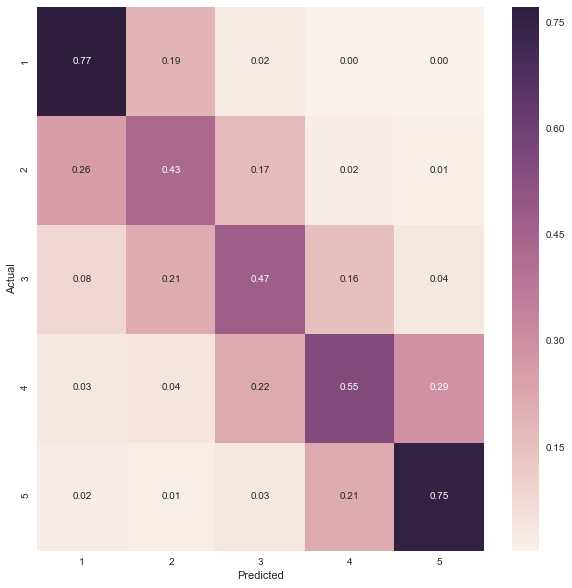

In [115]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat = conf_mat/conf_mat.sum(axis=1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='.2f',
            xticklabels=sorted(reviews.stars.unique()), yticklabels=sorted(reviews.stars.unique()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<div dir="rtl" style="font-size:16px;font-family:Palatino;line-height: 1.6">
لزيادة التحقق من النموذج سنقوم بعرض أحد التعليقات التي صنفها النموذج على أنها 5 وهي في الأساس 1 

</div>

In [116]:
X_test[(y_test==1)&(pred==5)].iloc[4]

'Went into Yo Amo Tacos today wondering if it was even open. It was so we thought we\'d give it a try. The place was completely empty but soon more people came in. \n\nWe opened the menu and found our usual Mexican staple, Enchiladas. The price was $22!!! Even if these were the best enchiladas we\'ve ever had (and we\'ve had some GOOD ones) I\'m sorry, there would be absolutely no way to justify $22. \n\nOther prices on the menu were equally ridiculous. I couldn\'t do it. I simply could not bring myself to order $22 enchiladas on principle.\n\nYo Amo Tacos (or Yo "heart" Tacos as the sign confusingly shows) is NOT a trendy or upscale place that can dare to charge prices like this for show. It\'s a run down joint that really should be fairly priced and awesome like mostly every other Mexican restaurant I\'ve had the pleasure to give positive ratings to. \n\nNo way, no how, no go, no Yo!'

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">

يتضح من التعليق أن الطعام كان جيد، لكن المشكلة بالسعر، ولعدم وجود أوصاف أو كلمات لذم السعر فقد قام النموذج بتصنيفه على أنه 5
</div>

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h1>نموذج ثنائي التصنيف Binary Classification</h1>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
كخطوة أخيرة نختم بها هذا هذا المشروع، سنجرب الاقتصار على تصنيفين فقط هما 1 و 5 لوجود تفاوت كبير بينهما لنشاهد تأثير تعدد التصنيفات وتداخلها، وسنقوم ببناء الـ Bag of words من جديد وتدريب النموذج بنفس الإعدادات السابقة. وسنشاهد التحسن الكبير بالدقة.
</div>

In [117]:
b_long_reviews = long_reviews[(long_reviews.stars == 1)|(long_reviews.stars == 5)]

b_X_train, b_X_test, b_y_train, b_y_test, b_indices_train, b_indices_test = train_test_split(b_long_reviews.text, b_long_reviews.stars, b_long_reviews.index, test_size=0.20, random_state=0)

b_training_data = count_vector.fit_transform(b_X_train)

b_testing_data = count_vector.transform(b_X_test)

In [118]:
b_model = clf.fit(b_training_data, b_y_train)
b_pred = b_model.predict(b_testing_data)

In [119]:
f1_score(b_y_test, b_pred, average='micro')

0.9748676730052931

<div style="direction:rtl; text-align:right; line-height:1.6; font-weight: bold;">

<h1>الخلاصة</h1>

</div>

<div style="direction:rtl; text-align:right; font-size:16px; line-height:1.6">
في بداية هذا المشروع تحدثنا بمقدمة مختصرة عن تصنيف النصوص والمشاكل والتحديات التي ستواجهنا في هذا المشروع، ثم تطرقنا إلى
كيفية معالجة النصوص وتمثيلها رقمياً، سواء باستخدام CountVectorizer أو TfidfVectorizer. كما قمنا بمقارنة أداء ثلاثة نماذج هي MultinomialNB و RandomForestClassifier و LogisticRegression ووجدنا أن الأخير هو أفضلهم أداءً. ثم قمنا بعد ذلك بتحويل المشكلة إلى تصنيف ثنائي Binary Classification واقتصرنا على التعليقات ذات التقييم 5 و 1 ولاحظنا التحسن الكبير في أداء النموذج.
<br/>
<br/>
ختاماً: هذا الدرس ليس نتاج خبرة طويلة في المجال، إنما هو في الأساس مشروع نفذته أثناء تعلمي لأحد الدروس في الانترنت، وبدلاُ من تركه حبيساً بين ملفاتي، رأيت أن أقوم بتعريبه وشرحه ونشره لتعم الفائدة. وشكراً
<br/>
<br/>
<b>
عبدالعزيز العريني <a align="center" href="https://www.linkedin.com/in/abdulazizalorainy/">Linkedin</a> </b>

</div>